In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('creditCardFraud_Data.csv')

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
data.shape

(1001, 24)

In [5]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

C:\Users\athrv\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athrv\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athrv\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athrv\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

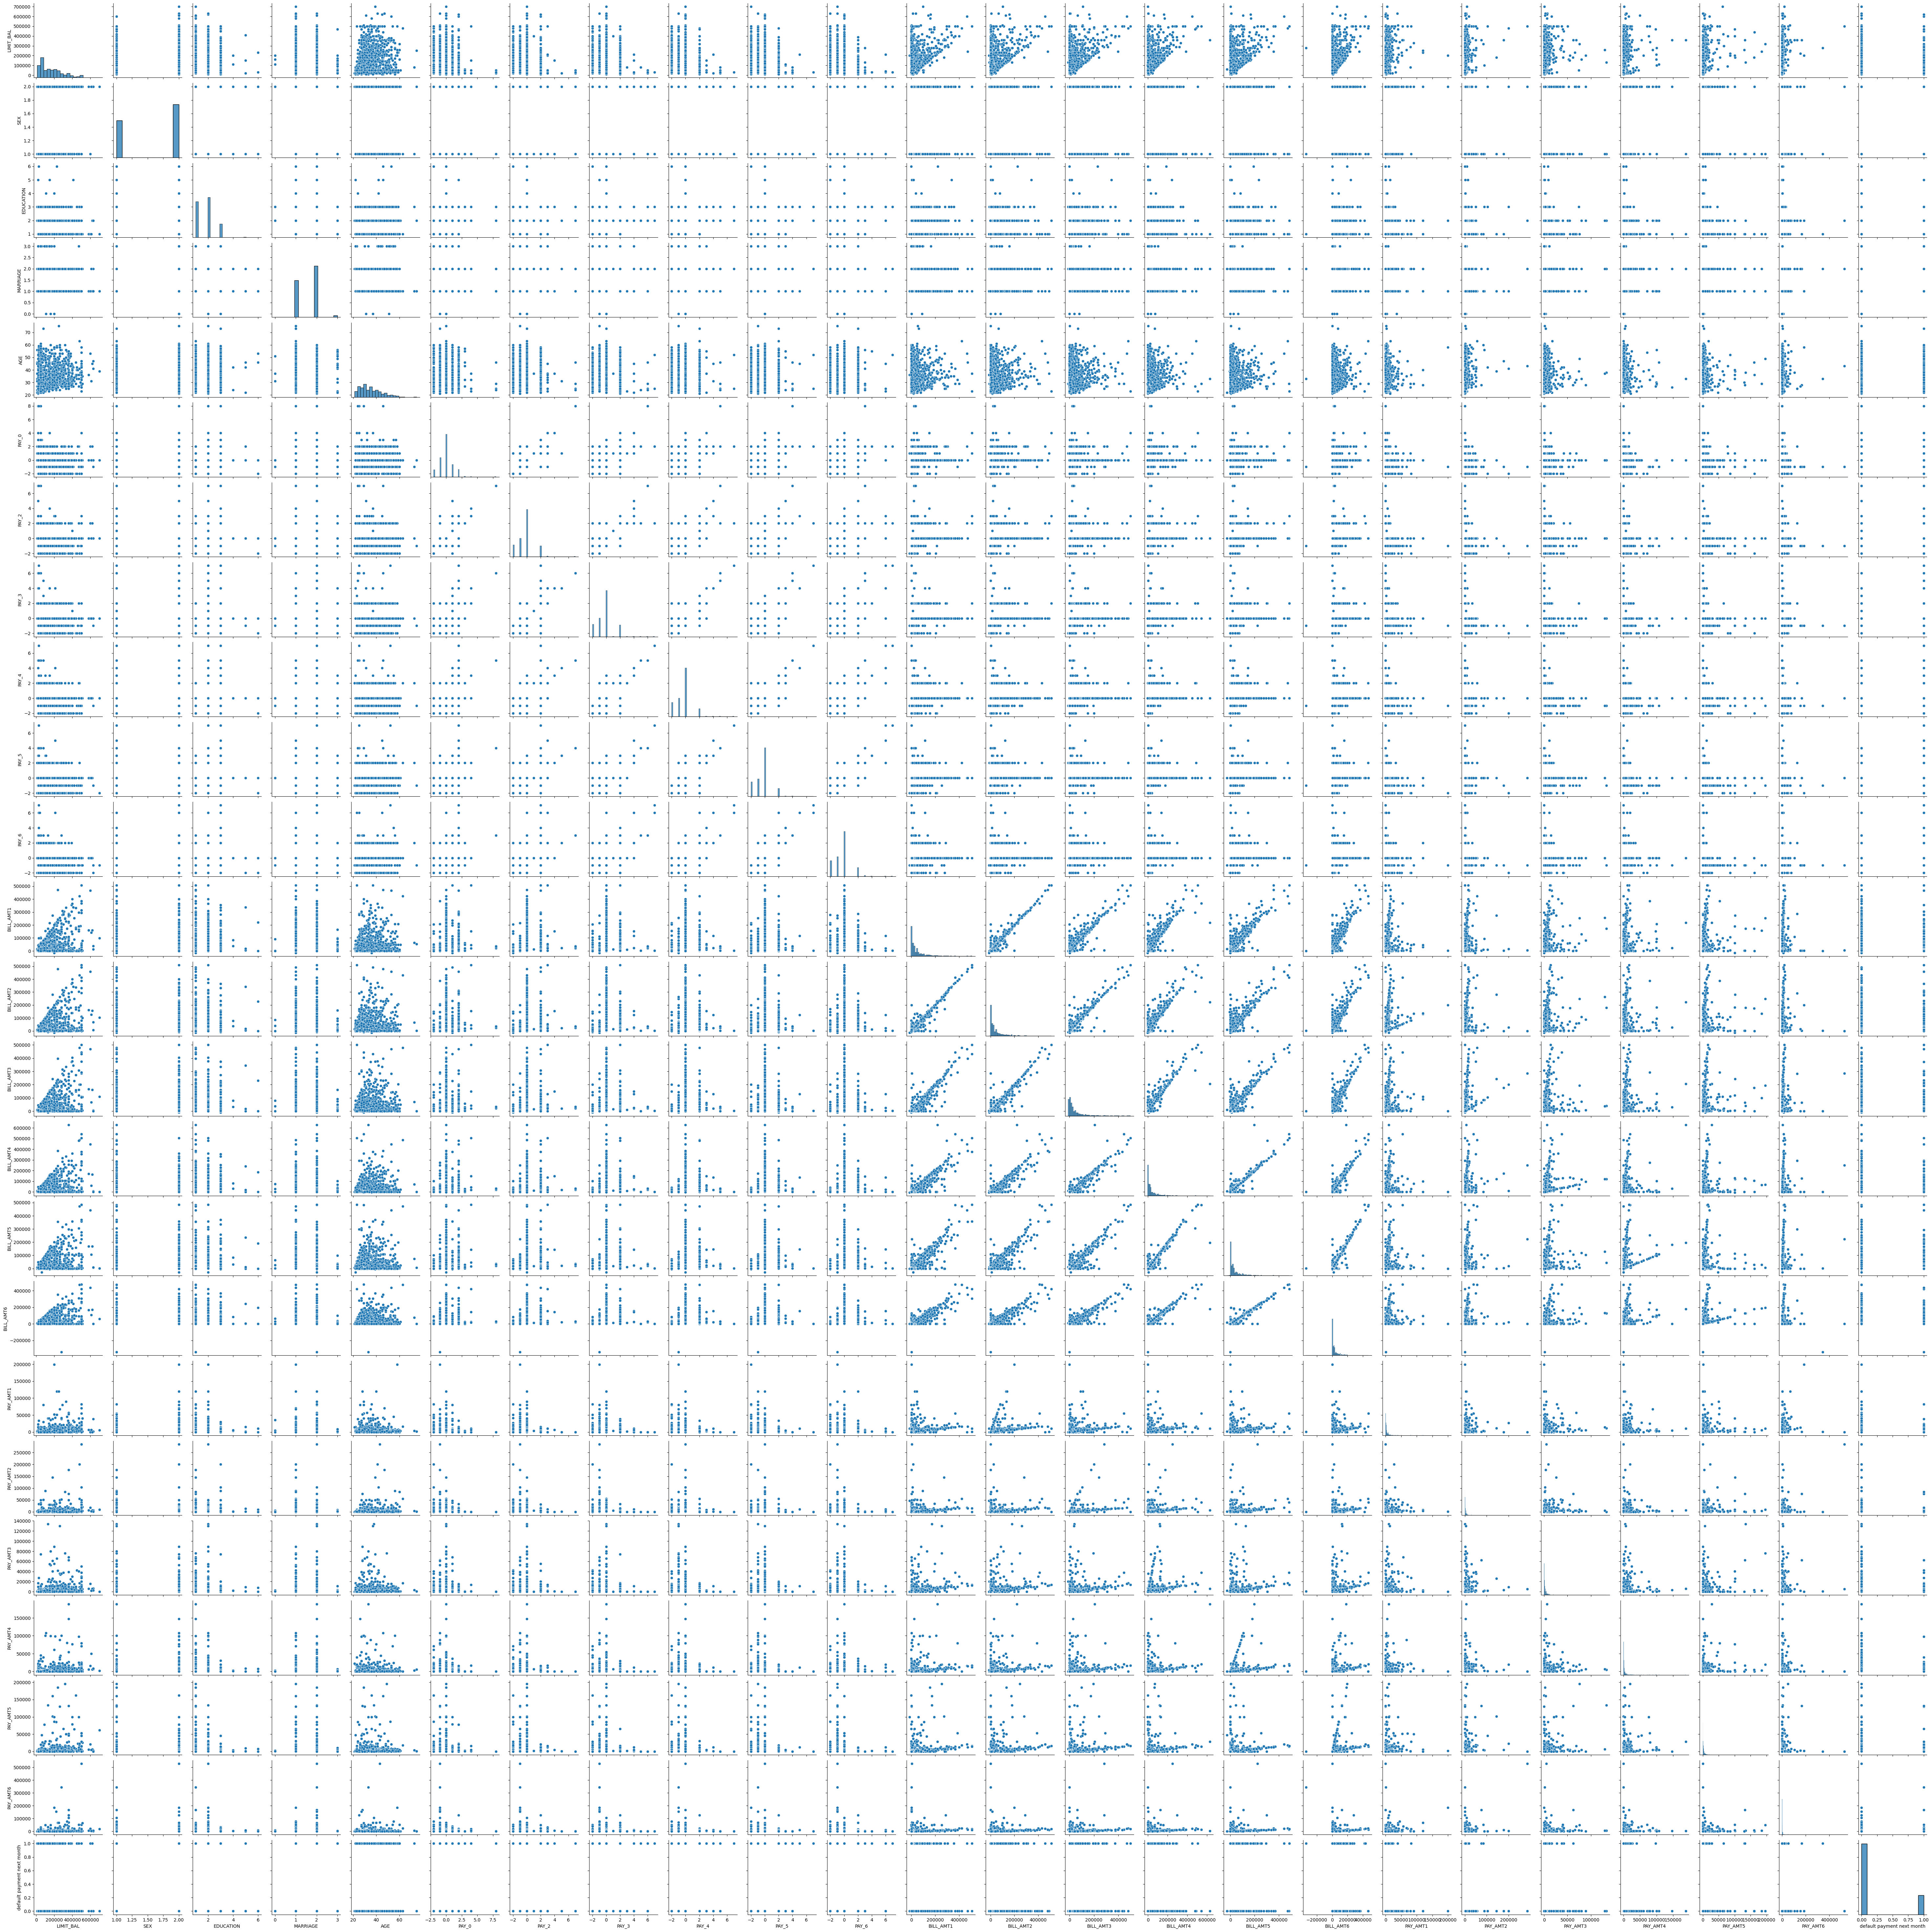

In [7]:
sns.pairplot(data)

From the pair-plot above, we can see that there is some relationship between the feature columns.
To confirm that we’d plot a correlation heatmap.


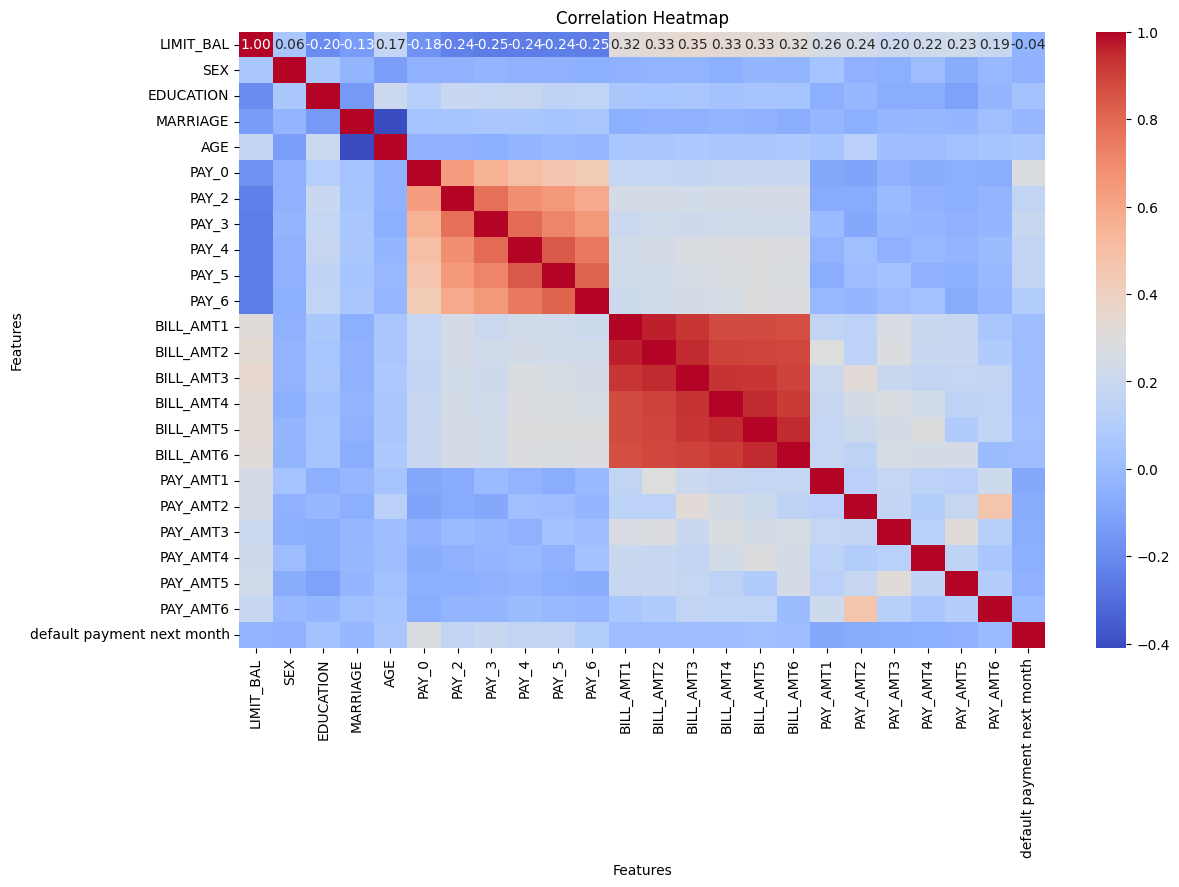

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent. 

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation. 


In [15]:
x=data.drop(labels=['default payment next month'],axis=1)
y=data['default payment next month']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [37]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [38]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [39]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [40]:
scaled_train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16831,0.210169,-0.365093,-1.238563,1.448725,-1.054777,1.464785,0.015441,-0.724837,-0.697423,-0.668007,...,-0.642576,-0.661257,-0.529514,-0.579208,-0.105018,-0.145558,-0.242409,0.201062,-0.014852,-0.233621
4222,-1.243527,-1.061279,-1.238563,-1.073197,0.861786,0.271955,1.794063,0.110028,0.141588,0.189890,...,0.228168,0.224623,0.099678,0.583327,-0.095828,-0.039170,0.152840,-0.212528,2.237818,0.268573
8736,-0.723106,-0.597155,0.807387,0.187764,0.861786,0.380394,0.015441,0.110028,0.141588,0.189890,...,-0.067356,-0.081444,-0.154738,-0.181984,-0.213650,-0.157335,-0.219417,-0.239691,-0.231210,-0.254511
27880,1.484011,-0.287739,0.807387,1.448725,-1.054777,-1.029313,0.015441,0.110028,1.819611,1.905684,...,1.169781,1.409281,1.438216,1.562072,0.316551,-0.133702,0.207584,-0.302252,0.074237,-0.012958
29290,1.646570,-0.906571,-1.238563,1.448725,0.861786,-1.029313,1.794063,0.110028,0.141588,0.189890,...,-0.068136,-0.166675,-0.389455,-0.369159,-0.210882,-0.010496,-0.213942,-0.228875,-0.268309,-0.257889


In [35]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [41]:
pred_y=gnb.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
ac=accuracy_score(y_test, pred_y)
ac

0.6601010101010101

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [47]:

#finding the best parameters
grid.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.579, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.662, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.714, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.648, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.689, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.667, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. var_smoothing=0.001, score=0.663, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.714, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.649, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.690, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.783, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.783, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.795, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [48]:
grid.best_estimator_

GaussianNB(priors=None, var_smoothing=0.5)

In [49]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [51]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.7792929292929293

In [68]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]
    

            }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [69]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 17.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130, 200],
                         'random_state': [0, 50, 100, 250, 355, 5

In [70]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
pred_y_xgb_new=xgb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [72]:
ac_xgb_new=accuracy_score(y_test,pred_y_xgb_new)

In [73]:
ac_xgb_new

0.8203030303030303


# Added: K-Nearest Neighbors (KNN) classification + EDA enhancements


**What I added:**


- EDA cells focused on KNN-relevant checks (class distribution, correlation heatmap, PCA scatter).
- Preprocessing steps important for KNN (Standard scaling).
- Train / test split with stratification.
- KNN model with **GridSearchCV** for hyperparameter tuning (n_neighbors, weights, p).
- Evaluation: classification report, confusion matrix, ROC curve and AUC.

**Notes:**
- These cells assume your main dataframe is named `df`. If your notebook uses a different variable (e.g. `data` or `dataset`), replace the variable name accordingly or run a cell that assigns `df = <your_variable>` before the KNN section.
- If `df` is not found when you run the appended cells, the code will try to load `creditcard.csv` from the notebook working directory.
- KNN is sensitive to feature scaling — that's handled here using `StandardScaler`.


In [ ]:

# 1) Imports for the new KNN/EDA section
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA

print('Imports for KNN + EDA ready')

In [ ]:

# 2) Load or detect dataframe `df` used in the notebook
# If your earlier notebook defines `df`, this cell will pick it up when run in the same kernel.
# If not, it'll attempt to load a local 'creditcard.csv' file.
try:
    # This will work only if you run the appended cells in the same notebook/kernel after earlier cells
    df
    print('Using existing dataframe variable: df (found in current kernel)')
except NameError:
    # try common names
    possible_names = ['data', 'dataset', 'creditcard', 'credit_card_df']
    found = False
    for name in possible_names:
        try:
            val = eval(name)
            df = val
            print(f'Using dataframe from variable: {name} -> assigned to df')
            found = True
            break
        except Exception:
            pass
    if not found:
        # Try loading creditcard.csv from working dir
        csv_path = 'creditcard.csv'
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            print(f'Loaded dataframe from {csv_path} with shape', df.shape)
        else:
            raise FileNotFoundError('No dataframe named df found in kernel and creditcard.csv not present in working dir. Define df or place creditcard.csv in the notebook folder.')

# quick show
print('Data shape:', df.shape)
df.head()

In [ ]:

# 3) EDA: Class distribution plot (fraud vs non-fraud)
# Assumes target column is named 'Class' (common in creditcard dataset); adjust if different.
target_col = 'Class' if 'Class' in df.columns else df.columns[-1]
counts = df[target_col].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title(f'Class distribution (target = {target_col})')
plt.xlabel('Class')
plt.ylabel('Count')
for i, v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, str(v), ha='center')
plt.show()

In [ ]:

# 4) EDA: Correlation heatmap (matplotlib imshow) - useful to spot highly correlated features
corr = df.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.title('Correlation matrix (heatmap) - use this to spot correlated features')
# show x/y tick labels sparsely if many columns
ncols = len(corr.columns)
if ncols <= 30:
    plt.xticks(range(ncols), corr.columns, rotation=90)
    plt.yticks(range(ncols), corr.columns)
plt.tight_layout()
plt.show()

In [ ]:

# 5) EDA: Quick PCA 2D scatter (helps visualize separability) - we'll use scaled features for PCA
features = df.drop(columns=[target_col])
# If there are non-numeric columns, drop them for PCA
features = features.select_dtypes(include=[np.number]).fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
# plot each class separately
classes = df[target_col].unique()
for cls in classes:
    mask = (df[target_col] == cls)
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=str(cls), alpha=0.6, s=18)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA (2 components) of scaled features')
plt.legend(title='Class')
plt.show()

In [ ]:

# 6) Prepare data for modeling: scaling (important for KNN) and train/test split
# Use numeric features only; make sure to adjust if you want specific features.
X = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).fillna(0)
y = df[target_col]

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split to preserve class imbalance distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

In [ ]:

# 7) KNN with GridSearchCV for hyperparameter tuning
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'p': [1,2]  # 1 -> Manhattan, 2 -> Euclidean
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(knn, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Best params:', gs.best_params_)
print('Best CV ROC AUC:', gs.best_score_)

In [ ]:

# 8) Evaluate the best KNN on the test set
best_knn = gs.best_estimator_
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:,1] if hasattr(best_knn, 'predict_proba') else best_knn.predict(X_test)

print('Classification report (test):')
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
print('Test ROC AUC:', roc_auc)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'KNN ROC curve (AUC = {roc_auc:.4f})')
plt.show()


## Next steps & tips


- If your dataset is highly imbalanced (as credit card fraud datasets usually are), consider using:
  - resampling strategies (SMOTE, ADASYN) **after** splitting (only fit resampler on the training set), or
  - class-weight-aware models (KNN doesn't support class_weight directly), or
  - evaluation metrics like Precision-Recall AUC, F1-score for the fraud class.

- KNN is computationally expensive for large datasets — if your dataset is large, consider using a smaller sample for KNN or use approximate nearest neighbors libraries.

- Compare KNN results with your existing models in the notebook (RandomForest, LogisticRegression, etc.) by running their evaluation cells on the same `X_test` / `y_test`.



# 🔁 Added: SMOTE Balancing and Model Comparison
This section extends the notebook with:
- **SMOTE (Synthetic Minority Over-sampling Technique)** to handle class imbalance.
- Re-training of KNN on the balanced dataset.
- A **comparison table** of accuracy, precision, recall, F1, and ROC-AUC across all models (including KNN and your existing ones, if available).


In [ ]:

# 9) Apply SMOTE to handle imbalance (fit only on training data)
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('Before SMOTE:', np.bincount(y_train))
print('After SMOTE:', np.bincount(y_train_sm))

In [ ]:

# 10) Re-train the best KNN model on SMOTE-balanced data and evaluate again
best_knn_sm = gs.best_estimator_
best_knn_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = best_knn_sm.predict(X_test)
y_proba_sm = best_knn_sm.predict_proba(X_test)[:,1]

print('Classification report after SMOTE:')
print(classification_report(y_test, y_pred_sm, digits=4))

roc_auc_sm = roc_auc_score(y_test, y_proba_sm)
print('Test ROC AUC (after SMOTE):', roc_auc_sm)

plt.figure(figsize=(6,5))
fpr_sm, tpr_sm, _ = roc_curve(y_test, y_proba_sm)
plt.plot(fpr_sm, tpr_sm, label=f'SMOTE KNN (AUC={roc_auc_sm:.4f})')
plt.plot([0,1],[0,1],'--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve - KNN with SMOTE')
plt.show()

In [ ]:

# 11) Model Comparison Table (KNN vs. existing models)
# Attempt to detect existing trained models from your notebook environment
import inspect

models_dict = {}
for varname, val in globals().items():
    if hasattr(val, "predict") and callable(getattr(val, "predict", None)):
        models_dict[varname] = val

results = []
for name, model in models_dict.items():
    try:
        y_pred_model = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_proba_model = model.predict_proba(X_test)[:,1]
        else:
            y_proba_model = y_pred_model

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred_model),
            "Precision": precision_score(y_test, y_pred_model, zero_division=0),
            "Recall": recall_score(y_test, y_pred_model, zero_division=0),
            "F1-Score": f1_score(y_test, y_pred_model, zero_division=0),
            "ROC-AUC": roc_auc_score(y_test, y_proba_model)
        })
    except Exception as e:
        print(f"Skipping {name}: {e}")

comparison_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)
print('Model Performance Comparison:')
display(comparison_df)


✅ **Interpretation:**
- The higher the ROC-AUC, the better the model at distinguishing fraud vs non-fraud.
- Compare your earlier models (e.g., Logistic Regression, Random Forest, XGBoost, etc.) with **KNN** (both before and after SMOTE).
- If your dataset is huge, SMOTE can be computationally heavy — use a sample subset for quick testing.
